In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import SineModel, GaussianModel

In [94]:
data  = pd.read_csv('../singlephotoncsv/interference.csv')

In [95]:
data = data.drop('relative Glass Shift', axis=1)

In [96]:
data= data.sort_values(by = 'Glass Shift')
data

,Glass Shift,Glass Shift.1,Coincidences,s1
123,-0.95,12.84,853,45000
122,-0.93,12.86,893,45000
121,-0.91,12.88,884,46000
120,-0.89,12.90,873,46000
119,-0.87,12.92,889,46000
...,...,...,...,...
52,0.92,14.71,901,46000
53,0.94,14.73,919,47000
54,0.96,14.75,902,47000
55,0.98,14.77,905,47000


In [97]:
x = data['Glass Shift']
y = data['Coincidences']

In [98]:
y -= max(y)/2

(0.0, 0.1)

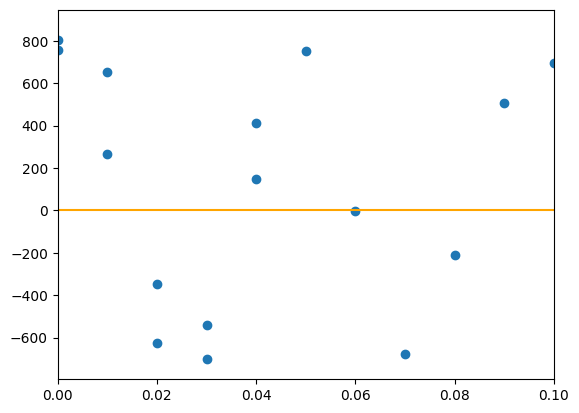

In [99]:
plt.scatter(x, y )
plt.axhline(0, color='orange')
plt.xlim(0,.1)

In [100]:
sine = SineModel(prefix='sin_')
params = sine.make_params(
    amplitude = 800,
    frequency = (0.5/(2*np.pi)),
    shift = np.pi/2
)

In [101]:
gauss = GaussianModel(prefix='gauss_')
params.update(gauss.make_params(
    amplitude = 1,
    sigma = 0.05,
    center = 0
))

name,value,initial value,min,max,vary,expression
sin_amplitude,800.000000,800.0,0.00000000,inf,True,
sin_frequency,0.07957747,0.07957747154594767,0.00000000,inf,True,
sin_shift,1.57079633,1.5707963267948966,-6.28319531,6.28319531,True,
gauss_amplitude,1.00000000,1.0,-inf,inf,True,
gauss_center,0.00000000,0.0,-inf,inf,True,
gauss_sigma,0.05000000,0.05,0.00000000,inf,True,
gauss_fwhm,0.11774100,None,-inf,inf,False,2.3548200*gauss_sigma
gauss_height,7.97884600,None,-inf,inf,False,"0.3989423*gauss_amplitude/max(1e-15, gauss_sigma)"


In [102]:
model = sine + gauss
out = model.fit(y, params, x=x)
print(out.fit_report())

[[Model]]
    (Model(sine, prefix='sin_') + Model(gaussian, prefix='gauss_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 491
    # data points      = 124
    # variables        = 6
    chi-square         = 13069593.6
    reduced chi-square = 110759.268
    Akaike info crit   = 1446.12416
    Bayesian info crit = 1463.04585
    R-squared          = 0.00185139
[[Variables]]
    sin_amplitude:    876.579020 +/- 5853666.54 (667785.38%) (init = 800)
    sin_frequency:    0.02817899 +/- 192.144093 (681870.12%) (init = 0.07957747)
    sin_shift:        3.07109380 +/- 482.029878 (15695.71%) (init = 1.570796)
    gauss_amplitude: -69.6025525 +/- 2553.48013 (3668.66%) (init = 1)
    gauss_center:    -1.12932468 +/- 8.51047958 (753.59%) (init = 0)
    gauss_sigma:      0.26055177 +/- 3.94568925 (1514.36%) (init = 0.05)
    gauss_fwhm:       0.61355252 +/- 9.29138799 (1514.36%) == '2.3548200*gauss_sigma'
    gauss_height:    -106.571537 +/- 2325.66839 (2182.26%) =

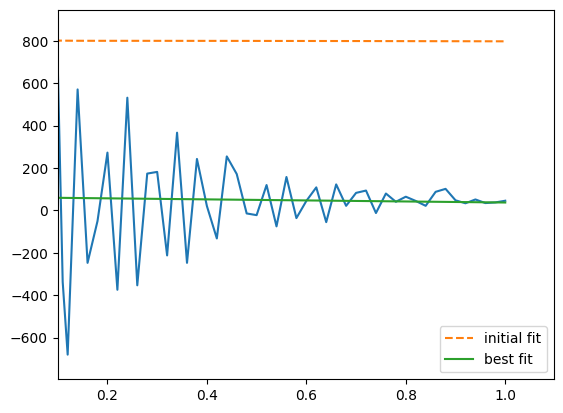

In [104]:
plt.plot(x, y)
plt.plot(x, out.init_fit, '--', label='initial fit')
plt.plot(x, out.best_fit, '-', label='best fit')
plt.xlim(0.1)
plt.legend()
plt.show()